In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df_full = pd.read_csv('../reports/result_df.csv')
df_full['name'] = df_full.T.apply(lambda row: '_'.join([str(x) for x in row.drop(['num', 'smape', 'mase*'])]))
print(df_full.shape)
df = df_full[df_full['num'].isna()].dropna(axis=1)
df = df[df['loss'] != 'mse']
print(df.shape)

df = df[~df['name'].duplicated(keep='first')]
print(df.shape)

(6221, 12)
(266, 11)
(266, 11)


In [37]:
def add_benchmarks(legend_loc=None):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.plot([-0.5, 350.5], [13.176, 13.176], ls='--', c='C3', label='M4 winner', lw=2)
    plt.plot([-0.5, 350.5], [12.913, 12.913], ls='--', c='C4', label='N-BEATS', lw=2)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.legend(loc=legend_loc)
    
def keep_duplicates(df, column):
    
    gb = df.groupby(column)

    for group in gb.groups:
        try:
            mask.merge(gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1), how='inner')
        except NameError:
            mask = gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1)
            
    results = [gb.get_group(group).merge(mask) for group in gb.groups]
    
    return pd.concat(results)

## Comparison of all models

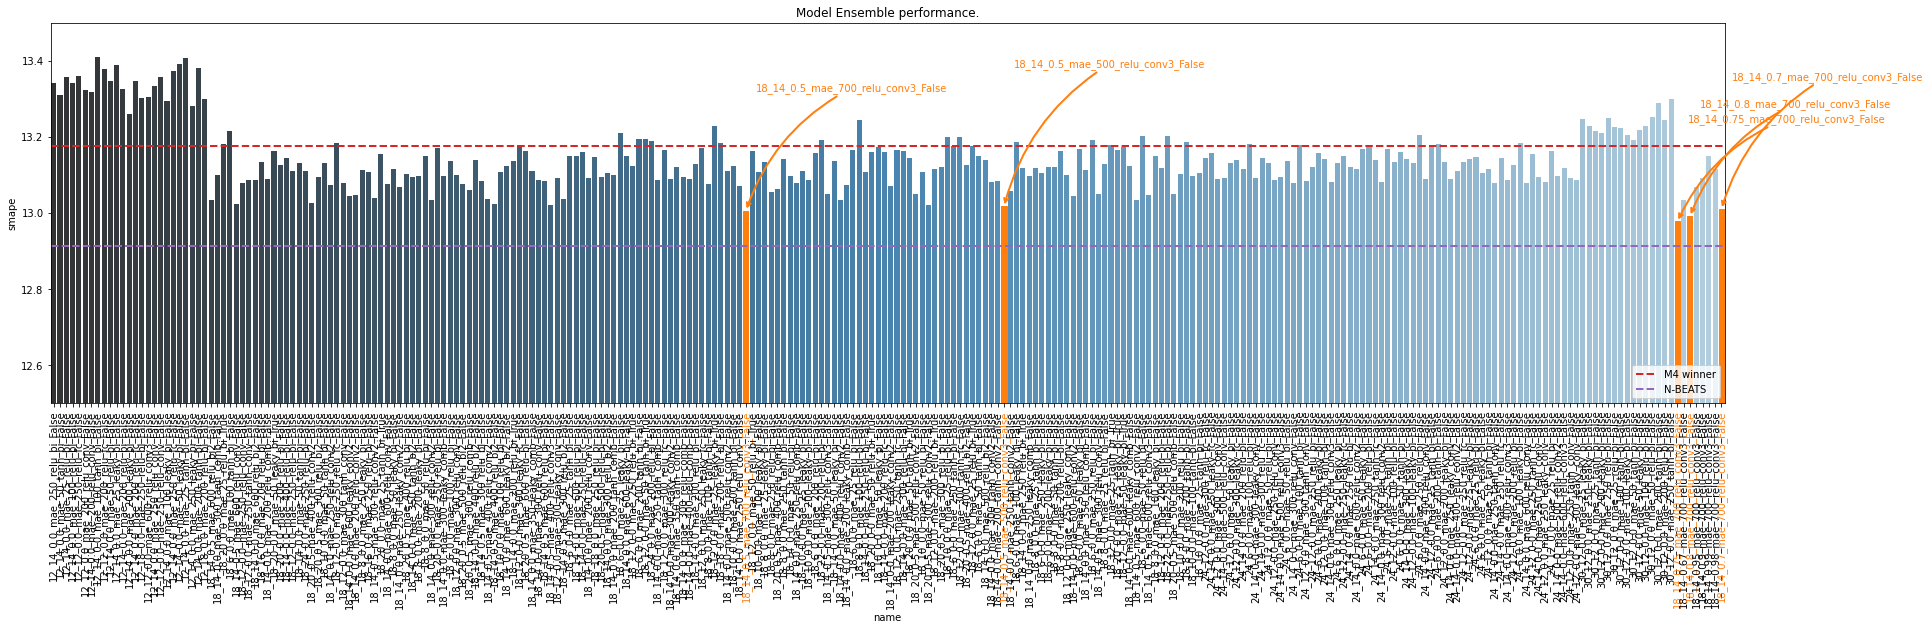

In [38]:
plt.figure(figsize=(30, 7))

top5 = df.reset_index().sort_values('smape')[:5].index

ax = sns.barplot(x='name', y='smape', data=df, palette='Blues_d')

[bar.set_color('C1') for bar in np.array(ax.get_children())[top5]]
[label.set_color('C1') for label in np.array(ax.get_xticklabels())[top5]]

for en, i in enumerate(top5):
    ax.annotate(df.iloc[i]['name'], (i, df.iloc[i]['smape']), 
                (10, 100+(en*10)), textcoords='offset points', c='C1',
                arrowprops={'arrowstyle': '->', 'color': 'C1',
                            'connectionstyle': 'arc3,rad=.2', 'lw': 2})

plt.title('Model Ensemble performance.')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks(legend_loc='lower right')

## Input size

In [39]:
df2 = df[df.drop(['name', 'input_len', 'smape', 'mase*'], axis=1).duplicated(keep=False)].drop('name', axis=1)
df2 = keep_duplicates(df2, 'input_len')

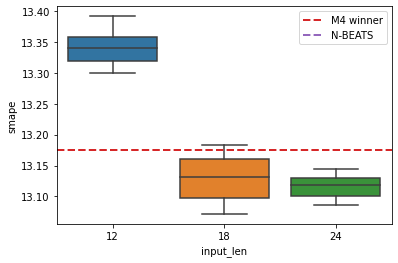

In [40]:
sns.boxplot(x='input_len', y='smape', data=df2)
add_benchmarks()

## Output size

In [41]:
df3 = keep_duplicates(df.drop('name', axis=1), 'output_len')

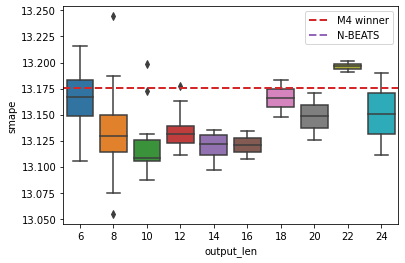

In [42]:
sns.boxplot(x='output_len', y='smape', data=df3)
add_benchmarks()

## Bottleneck

In [43]:
df4 = keep_duplicates(df.drop('name', axis=1), 'bottleneck_size')

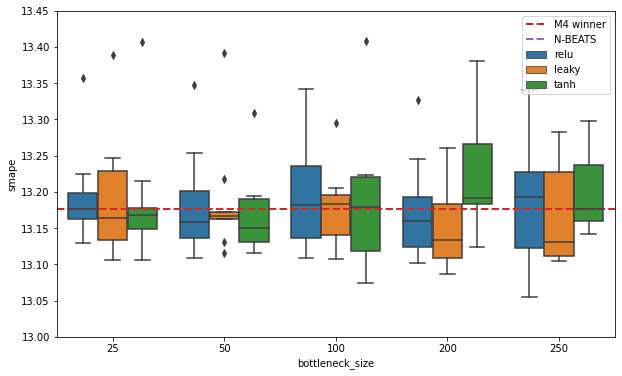

In [44]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='bottleneck_size', y='smape', data=df4, hue='bottleneck_activation')
plt.ylim([13, 13.45])
add_benchmarks()

## Model type

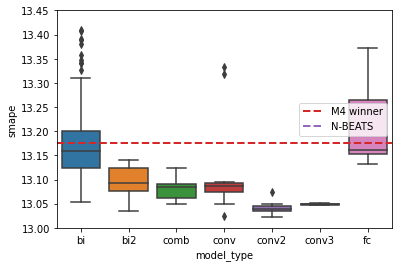

In [45]:
df5 = keep_duplicates(df.drop('name', axis=1), 'model_type')

sns.boxplot(x='model_type', y='smape', data=df5)
plt.ylim([13, 13.45])
add_benchmarks()

### 5 best models (according to SMAPE)

In [46]:
df.sort_values('smape').head(5)

,input_len,output_len,aug,loss,bottleneck_size,bottleneck_activation,model_type,line,smape,mase*,name
6003,18,14,0.75,mae,700,relu,conv3,False,12.977481,2.653273,18_14_0.75_mae_700_relu_conv3_False
6065,18,14,0.80,mae,700,relu,conv3,False,12.991487,2.661309,18_14_0.8_mae_700_relu_conv3_False
2858,18,14,0.50,mae,700,relu,conv3,False,13.006215,2.662265,18_14_0.5_mae_700_relu_conv3_False
6220,18,14,0.70,mae,700,relu,conv3,False,13.009891,2.667154,18_14_0.7_mae_700_relu_conv3_False
3809,18,14,0.50,mae,500,relu,conv3,False,13.017147,2.668275,18_14_0.5_mae_500_relu_conv3_False


## Line models

In [47]:
df6 = keep_duplicates(df.drop('name', axis=1), 'line')

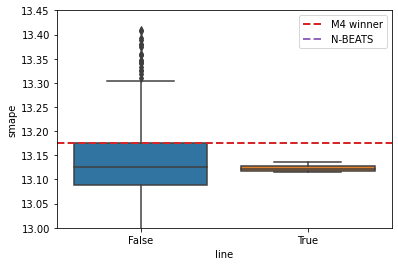

In [48]:
plt.figure(figsize=(6, 4))

sns.boxplot(x='line', y='smape', data=df6)
plt.ylim([13, 13.45])
add_benchmarks()

## 30+ model ensembles

In [49]:
df7 = df.merge(df_full[df_full['num'] == 29].drop(['num', 'smape', 'mase*'], axis=1), on='name')

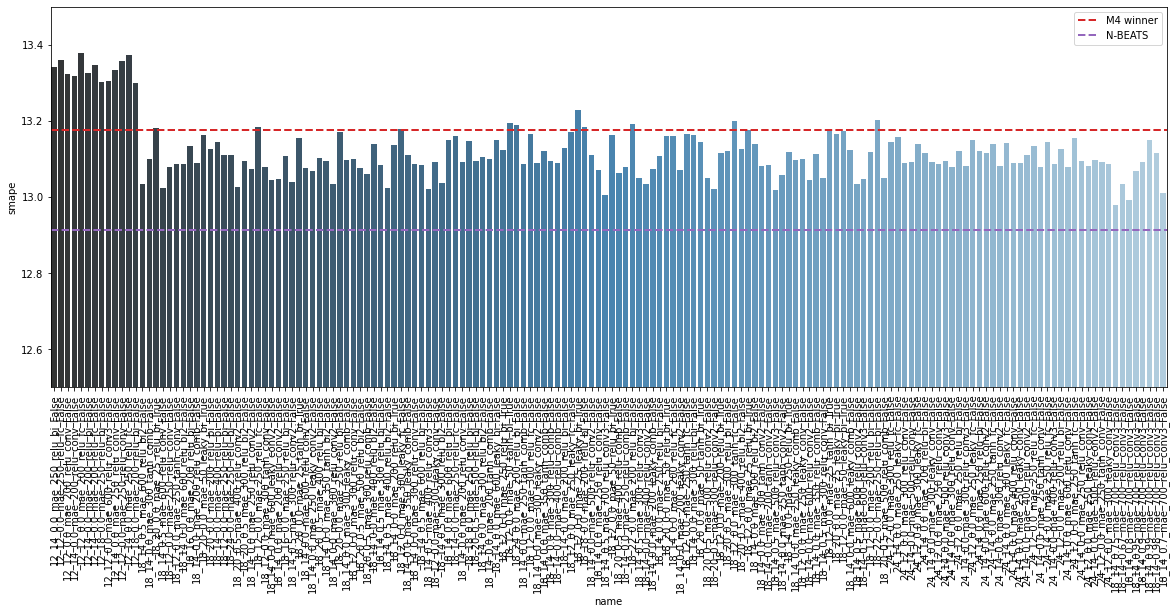

In [50]:
plt.figure(figsize=(20, 7))
sns.barplot(x='name', y='smape', data=df7, palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

## New

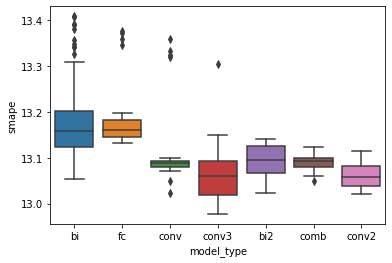

In [51]:
sns.boxplot(x='model_type', y='smape', data=df)

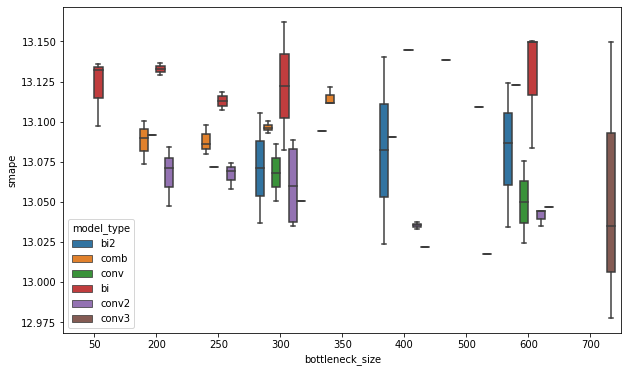

In [52]:
plt.figure(figsize=(10, 6))

df8 = df[(df['input_len'] == 18) & (df['output_len'] == 14) & (df['model_type'] != 'fc')]

sns.boxplot(x='bottleneck_size', y='smape', hue='model_type', data=df8)

### Augmentation

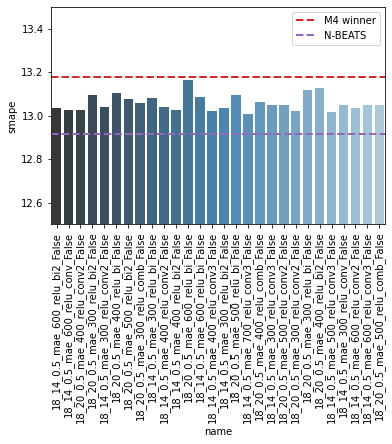

In [53]:
sns.barplot(x='name', y='smape', data=df[df['aug'] == 0.5], palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

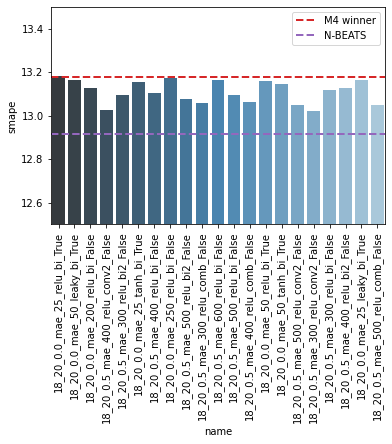

In [54]:
sns.barplot(x='name', y='smape', data=df[df['output_len'] == 20], palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

In [55]:
df[(df['aug'] == True) & (df['output_len'] != 20)]

,input_len,output_len,aug,loss,bottleneck_size,bottleneck_activation,model_type,line,smape,mase*,name


In [56]:
df9 = df[(df['output_len'] == 14) & 
         (df['input_len'] == 18) & 
         (df['bottleneck_activation'] == 'relu') & 
         ((df['bottleneck_size'] == 300) | (df['bottleneck_size'] == 600)) & 
         ((df['model_type'] == 'conv2') | (df['model_type'] == 'bi2' ) | (df['model_type'] == 'bi') | (df['model_type'] == 'conv' ))]

In [57]:
df9[df9['model_type'] == 'conv']

,input_len,output_len,aug,loss,bottleneck_size,bottleneck_activation,model_type,line,smape,mase*,name
669,18,14,0.5,mae,600,relu,conv,False,13.024182,2.663124,18_14_0.5_mae_600_relu_conv_False
1353,18,14,0.0,mae,600,relu,conv,False,13.075726,2.682111,18_14_0.0_mae_600_relu_conv_False
1935,18,14,0.0,mae,300,relu,conv,False,13.086149,2.682660,18_14_0.0_mae_300_relu_conv_False
4114,18,14,0.5,mae,300,relu,conv,False,13.050187,2.678155,18_14_0.5_mae_300_relu_conv_False


In [58]:
df9

,input_len,output_len,aug,loss,bottleneck_size,bottleneck_activation,model_type,line,smape,mase*,name
565,18,14,0.5,mae,600,relu,bi2,False,13.034002,2.666516,18_14_0.5_mae_600_relu_bi2_False
669,18,14,0.5,mae,600,relu,conv,False,13.024182,2.663124,18_14_0.5_mae_600_relu_conv_False
762,18,14,0.0,mae,600,relu,bi2,False,13.086968,2.673406,18_14_0.0_mae_600_relu_bi2_False
1291,18,14,0.5,mae,300,relu,conv2,False,13.038302,2.672894,18_14_0.5_mae_300_relu_conv2_False
1353,18,14,0.0,mae,600,relu,conv,False,13.075726,2.682111,18_14_0.0_mae_600_relu_conv_False
1510,18,14,0.0,mae,300,relu,conv2,False,13.034696,2.669965,18_14_0.0_mae_300_relu_conv2_False
1738,18,14,0.5,mae,300,relu,bi,False,13.082607,2.680972,18_14_0.5_mae_300_relu_bi_False
1935,18,14,0.0,mae,300,relu,conv,False,13.086149,2.682660,18_14_0.0_mae_300_relu_conv_False
1966,18,14,0.5,mae,600,relu,bi,False,13.083751,2.684029,18_14_0.5_mae_600_relu_bi_False
2059,18,14,0.5,mae,300,relu,bi2,False,13.036567,2.667186,18_14_0.5_mae_300_relu_bi2_False


In [59]:
for i in range(len(df9)):
    print('{:<38} {:.6f}'.format(df9['name'].iloc[i], df9['smape'].iloc[i]))

18_14_0.5_mae_600_relu_bi2_False       13.034002
18_14_0.5_mae_600_relu_conv_False      13.024182
18_14_0.0_mae_600_relu_bi2_False       13.086968
18_14_0.5_mae_300_relu_conv2_False     13.038302
18_14_0.0_mae_600_relu_conv_False      13.075726
18_14_0.0_mae_300_relu_conv2_False     13.034696
18_14_0.5_mae_300_relu_bi_False        13.082607
18_14_0.0_mae_300_relu_conv_False      13.086149
18_14_0.5_mae_600_relu_bi_False        13.083751
18_14_0.5_mae_300_relu_bi2_False       13.036567
18_14_0.0_mae_600_relu_bi_False        13.149790
18_14_0.0_mae_300_relu_bi2_False       13.105067
18_14_0.0_mae_300_relu_bi_False        13.162402
18_14_0.0_mae_600_relu_conv2_False     13.044397
18_14_0.5_mae_300_relu_conv_False      13.050187
18_14_0.5_mae_600_relu_conv2_False     13.034879


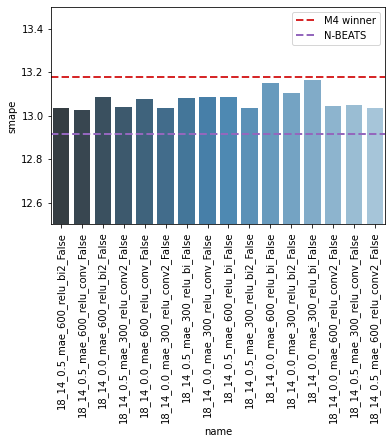

In [60]:
sns.barplot(x='name', y='smape', data=df9, palette='Blues_d')
plt.ylim([12.5, 13.5])
plt.xticks(rotation=90)

add_benchmarks()

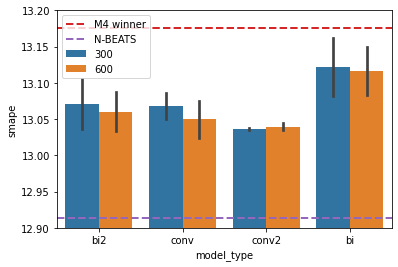

In [61]:
sns.barplot(x='model_type', y='smape', hue='bottleneck_size', data=df9)
plt.ylim([12.9, 13.2])

add_benchmarks()

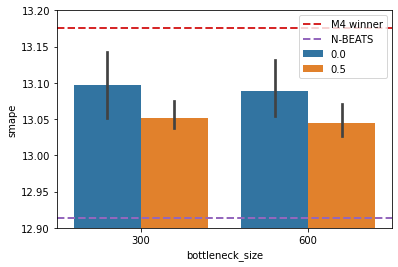

In [62]:
sns.barplot(x='bottleneck_size', y='smape', hue='aug', data=df9)
plt.ylim([12.9, 13.2])

add_benchmarks()

## Compare conv models

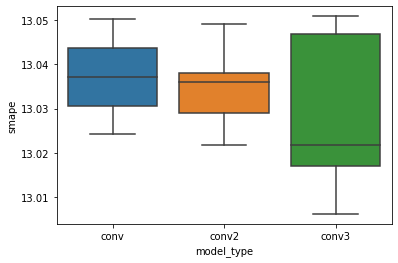

In [63]:
sns.boxplot(x='model_type', y='smape', data=df[(df['model_type'].apply(lambda x: 'conv' in x)) & (df['input_len'] == 18) & (df['aug'] == 0.5)])

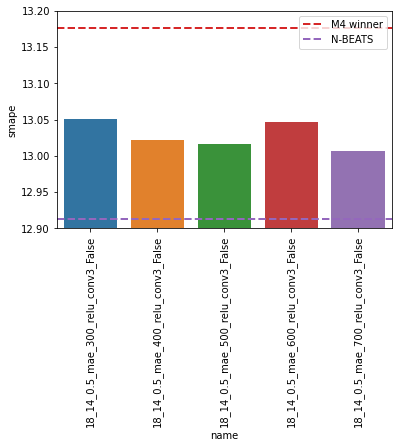

In [64]:
sns.barplot(x='name', y='smape', data=df[(df['model_type'] == 'conv3') & (df['aug'] == 0.5)].sort_values('bottleneck_size'))

plt.ylim([12.9, 13.2])
plt.xticks(rotation=90)
add_benchmarks()

In [65]:
df[(df['model_type'] == 'conv3') & (df['aug'] == 0.5)].sort_values('bottleneck_size').loc[:, ['name', 'smape']]

,name,smape
3101,18_14_0.5_mae_300_relu_conv3_False,13.050795
1997,18_14_0.5_mae_400_relu_conv3_False,13.021708
3809,18_14_0.5_mae_500_relu_conv3_False,13.017147
4322,18_14_0.5_mae_600_relu_conv3_False,13.046719
2858,18_14_0.5_mae_700_relu_conv3_False,13.006215


## Explore augmentation

In [66]:
df10 = df[(df['aug'] >= 0.5) & (df['model_type'] == 'conv3') & (df['bottleneck_size'] == 700)]

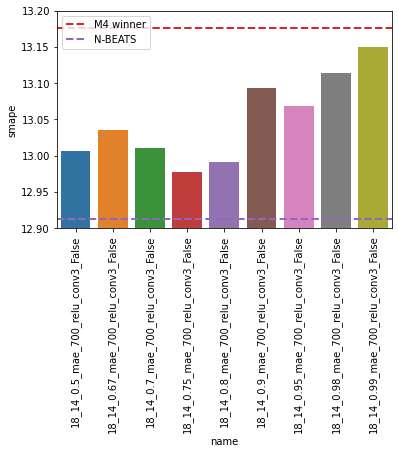

In [67]:
sns.barplot(x='name', y='smape', data=df10.sort_values('aug'))

plt.ylim([12.9, 13.2])
plt.xticks(rotation=90)
add_benchmarks()

In [68]:
df10.sort_values('aug').loc[:, ['name', 'smape']]

,name,smape
2858,18_14_0.5_mae_700_relu_conv3_False,13.006215
6034,18_14_0.67_mae_700_relu_conv3_False,13.035201
6220,18_14_0.7_mae_700_relu_conv3_False,13.009891
6003,18_14_0.75_mae_700_relu_conv3_False,12.977481
6065,18_14_0.8_mae_700_relu_conv3_False,12.991487
6127,18_14_0.9_mae_700_relu_conv3_False,13.092719
6096,18_14_0.95_mae_700_relu_conv3_False,13.068350
6189,18_14_0.98_mae_700_relu_conv3_False,13.114434
6158,18_14_0.99_mae_700_relu_conv3_False,13.149447
